In [4]:
include("ultrasoundgeneration.jl")

slice_multiprobe (generic function with 1 method)

In [5]:
using PyCall
pushfirst!(PyVector(pyimport("sys")."path"), "")
ultrasoundgeneration = pyimport("ultrasoundgeneration")

names = readdir(ultrasoundgeneration.test_volumes_path)


8-element Array{String,1}:
 "Pancreas_10.nrrd"
 "Pancreas_11.nrrd"
 "Pancreas_12.nrrd"
 "Pancreas_13.nrrd"
 "Pancreas_6.nrrd" 
 "Pancreas_7.nrrd" 
 "Pancreas_8.nrrd" 
 "Pancreas_9.nrrd" 

In [6]:
image, annotation = ultrasoundgeneration.load_image_annotation(
    names[1], ultrasoundgeneration.test_volumes_path)

iarray = np.array(image)
jimage = ItkImage(image)

ItkImage(CuTexture{Float32,3,CuTextureArray{Float32,3}}(CuTextureArray{Float32,3}(Ptr{Nothing} @0x000000000712a820, (223, 512, 512)), 0x0000000000000001), Float32[1.0 0.0 0.0; 0.0 -1.0 0.0; 0.0 0.0 -1.0], Float32[0.8203125, 0.8203125, 1.0], Float32[512.0, 512.0, 223.0])

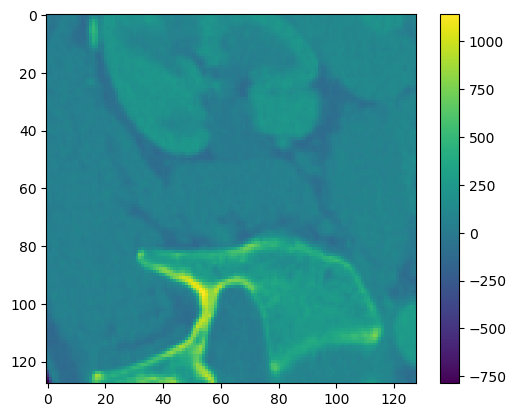

PyObject <matplotlib.colorbar.Colorbar object at 0x7f9da13ee9e8>

In [7]:
using PyPlot
t = generate_sample(jimage, annotation)
plt.imshow(t["data"][4])
colorbar()

In [8]:
network_parallel = pyimport("train_network_parallel2")

PyObject <module 'train_network_parallel2' from '/media/data/hastings/ct-angledslice-align/train_network_parallel2.py'>

In [9]:
function generate_data(jimages, annotations)
    res = []#::Array{Dict{String,Array{T,1} where T}, 1} = []
    for(jimage, annotation) = zip(jimages, annotations)
        for(i) = 1:128
            push!(res, generate_sample(jimage, annotation))
            #push!(res, ultrasoundgeneration.generate_sample(
            #        jimage, annotation))
        end
    end
    print("i")
    
    data = [] #::Array{Array{Float32, 3}, 1} = []
    classes = []
    for elem = res
        data_entry = cat(
            [reshape(x, Val(3)) for x in elem["data"]]...;
            dims=3
        ).* 1.0f0
        data_entry .+= 1000
        data_entry ./= 2000
        
        push!(data, np.array(data_entry))
        
        c = elem["classes"] 
        class_entry = vcat(c[1] ./ 4, 40 .* reshape(c[2], Val(1)))
        class_entry[[4, 8, 12]] .-= 40
        push!(classes, class_entry)
    end
    return data, classes
end
        
        

generate_data (generic function with 1 method)

In [10]:
function longcat(data)
    data2 = zeros(Float32, (length(data), size(data[1])...))
    for i = 1:length(data)
        data2[i, :, :, :] = data[i]
    end
    return data2
end

    

longcat (generic function with 1 method)

In [11]:
while true
    data, classes = generate_data([jimage for i = 1:60], [annotation for i = 1:60])
    network_parallel.model.fit(longcat(data), longcat(classes), batch_size=90,
        verbose=2)
end

iwhoop
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 4)  0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 128, 128, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 128, 128, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
lambda_2 (Lambda)               (None, 128, 128, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
lam

2020-06-13 12:55:58.918659: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2020-06-13 12:55:58.925461: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:964] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-06-13 12:55:58.926057: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1432] Found device 0 with properties: 
name: GeForce GTX 1080 major: 6 minor: 1 memoryClockRate(GHz): 1.7335
pciBusID: 0000:01:00.0
totalMemory: 7.93GiB freeMemory: 6.61GiB
2020-06-13 12:55:58.926068: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1511] Adding visible gpu devices: 0
2020-06-13 12:55:59.909495: I tensorflow/core/common_runtime/gpu/gpu_device.cc:982] Device interconnect StreamExecutor with strength 1 edge matrix:
2020-06-13 12:55:59.909516: I tensorflow/core/common_runtime/gpu/gpu_devi

Epoch 1/1
 - 19s - loss: 3.4705
iEpoch 1/1
 - 20s - loss: 2.9927
iEpoch 1/1
 - 19s - loss: 2.7611
iEpoch 1/1
 - 19s - loss: 2.5489
iEpoch 1/1
 - 19s - loss: 2.3908
iEpoch 1/1
 - 19s - loss: 2.2472
iEpoch 1/1
 - 19s - loss: 2.1645
iEpoch 1/1
 - 19s - loss: 2.0673
iEpoch 1/1
 - 19s - loss: 2.0147
iEpoch 1/1
 - 19s - loss: 1.9354
iEpoch 1/1
 - 19s - loss: 1.8953
iEpoch 1/1
 - 19s - loss: 1.8339
iEpoch 1/1
 - 19s - loss: 1.7669
iEpoch 1/1
 - 19s - loss: 1.7529
iEpoch 1/1
 - 19s - loss: 1.6713
iEpoch 1/1
 - 19s - loss: 1.6568
iEpoch 1/1
 - 19s - loss: 1.6165
iEpoch 1/1
 - 19s - loss: 1.5284
iEpoch 1/1
 - 19s - loss: 1.5239
iEpoch 1/1
 - 19s - loss: 1.4710
iEpoch 1/1
 - 19s - loss: 1.4879
iEpoch 1/1
 - 19s - loss: 1.4551
iEpoch 1/1
 - 19s - loss: 1.3971
iEpoch 1/1
 - 19s - loss: 1.3838
iEpoch 1/1
 - 19s - loss: 1.3641
iEpoch 1/1
 - 19s - loss: 1.3712
iEpoch 1/1
 - 19s - loss: 1.3377
iEpoch 1/1
 - 19s - loss: 1.3438
iEpoch 1/1
 - 19s - loss: 1.2757
iEpoch 1/1
 - 19s - loss: 1.2640
iEpoch 1/1


InterruptException: InterruptException:

In [66]:
using BenchmarkTools

In [11]:
@time [generate_sample(jimage, annotation) for _ = 1:7000]
0

  2.378710 seconds (6.59 M allocations: 2.185 GiB, 8.40% gc time)


0

In [17]:
@time data, classes = generate_data([jimage for i = 1:60], [annotation for i = 1:60])
0

i  4.776494 seconds (7.71 M allocations: 8.038 GiB, 18.19% gc time)


0

In [16]:
network_parallel.model.fit(longcat(data), longcat(classes))

Epoch 1/1
7680/7680 [==============================] - 25s 3ms/step - loss: 0.6350


PyObject <tensorflow.python.keras.callbacks.History object at 0x7f9ca4483588>

In [18]:
predictions = network_parallel.model.predict(longcat(data))
0

0

In [19]:
gtruth = longcat(classes)
0

0

In [20]:
network_parallel.model.save("models/juliatrain2")

In [43]:
i = 1

1

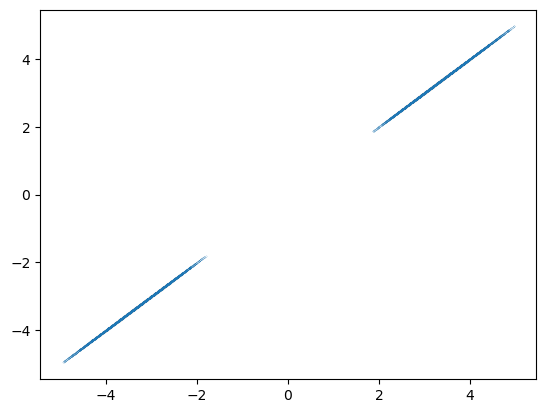

In [51]:
#i += 1
scatter(gtruth[:, i], gtruth[:, i], s= 0.01)
show()


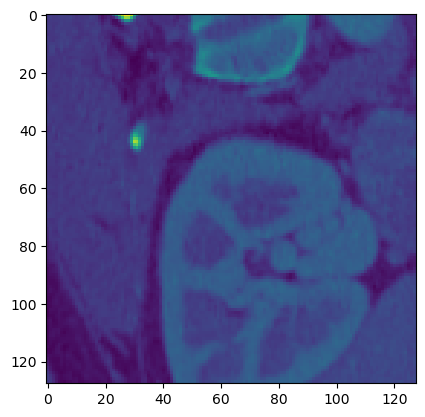

PyObject <matplotlib.image.AxesImage object at 0x0000001CA7EE6780>

In [56]:
imshow(data[1][:, :, 1])

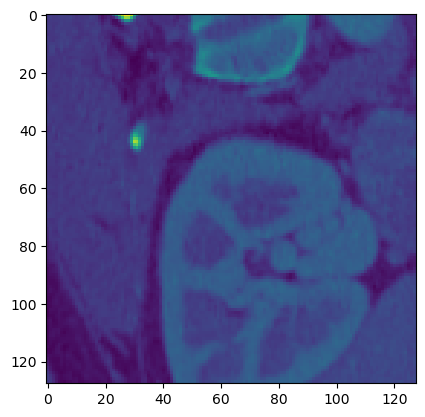

PyObject <matplotlib.image.AxesImage object at 0x0000001CA9F1F2E8>

In [57]:
imshow(data[1][:, :, 3])

In [74]:
@btime generate_sample(jimage, annotation)

  2.833 ms (821 allocations: 319.30 KiB)


Dict{String,Array{T,1} where T} with 2 entries:
  "classes" => Array{Float64,N} where N[[15.6977, 18.5604, -12.931], [0.995609 …
  "data"    => Array{Float32,2}[[-965.027 -917.938 … -65.8906 -33.3945; -958.46…

In [56]:
using Rotations

In [54]:
]add Rotations

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  99.9 %0.0 %                                  ]  14.8 % %>                      ]  44.3 %========================>                ]  59.2 % %>         ]  75.9 % [=====================================>   ]  90.8 % Resolving package versions...


┌ Warning: julia version requirement for package CuTextures not satisfied
└ @ Pkg.Operations /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.3/Pkg/src/Operations.jl:229


 Installed Rmath_jll ────── v0.2.2+1
 Installed Compat ───────── v3.12.0
 Installed GeometryBasics ─ v0.2.12
  Updating `~/.julia/environments/v1.3/Project.toml`
  [6038ab10] + Rotations v0.13.0
  Updating `~/.julia/environments/v1.3/Manifest.toml`
  [34da2185] ↑ Compat v3.11.0 ⇒ v3.12.0
  [5c1252a2] ↑ GeometryBasics v0.2.11 ⇒ v0.2.12
  [f50d1b31] ↑ Rmath_jll v0.2.2+0 ⇒ v0.2.2+1


In [111]:
rs = [r.theta3 for r in RotXYZ{Float64}.(ultrasoundgeneration.random_small_rotation.(15 .+ zeros(10000)))]

10000-element Array{Float64,1}:
 -0.11712882502760963 
 -0.11541301583995608 
  0.03824323464930887 
  0.056124852505262515
 -0.1357983283115456  
 -0.17966577985790289 
  0.039119439173769824
 -0.08546579571463492 
 -0.15025349273506522 
 -0.01559086064624956 
 -0.07899328548394549 
  0.146646472330696   
 -0.1757698095878502  
  ⋮                   
 -0.07538076354920269 
 -0.11890278617523366 
  0.17140994397790468 
 -0.12012141734289403 
  0.16184184416994785 
  0.17944086657785407 
 -0.15887835700042424 
  0.008001680929756626
 -0.12406413007016365 
  0.11847794514811096 
  0.08987493329229881 
 -0.17734584028461295 

In [ ]:
.2 * 

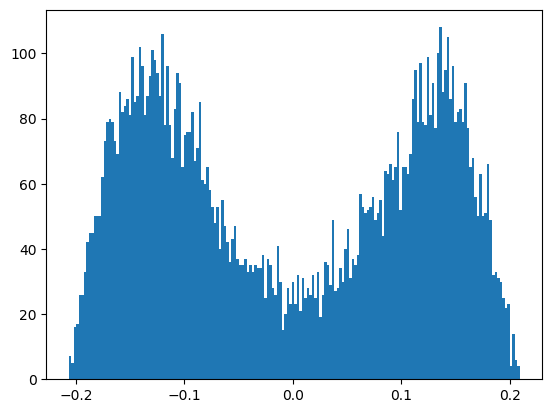

([7.0, 5.0, 16.0, 17.0, 26.0, 26.0, 33.0, 42.0, 45.0, 45.0  …  33.0, 31.0, 30.0, 25.0, 22.0, 23.0, 4.0, 14.0, 6.0, 4.0], [-0.2067479844648879, -0.20443913817672058, -0.20213029188855328, -0.19982144560038595, -0.19751259931221865, -0.19520375302405132, -0.192894906735884, -0.1905860604477167, -0.18827721415954937, -0.18596836787138205  …  0.1880647308117231, 0.1903735770998904, 0.19268242338805774, 0.19499126967622504, 0.19730011596439234, 0.1996089622525597, 0.201917808540727, 0.2042266548288943, 0.20653550111706165, 0.20884434740522895], PyObject[PyObject <matplotlib.patches.Rectangle object at 0x7f994c4dd160>, PyObject <matplotlib.patches.Rectangle object at 0x7f994c4d2ef0>, PyObject <matplotlib.patches.Rectangle object at 0x7f994c4dd6d8>, PyObject <matplotlib.patches.Rectangle object at 0x7f994c4dd9e8>, PyObject <matplotlib.patches.Rectangle object at 0x7f994c4ddcf8>, PyObject <matplotlib.patches.Rectangle object at 0x7f994c4ddfd0>, PyObject <matplotlib.patches.Rectangle object at 

In [112]:
hist(rs, bins=180)

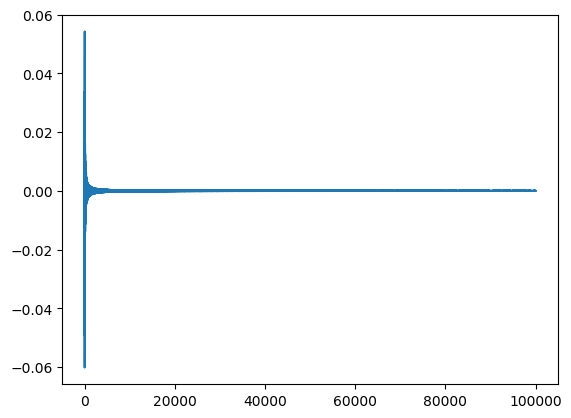

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f9c7fdcb630>

In [82]:
plot(rs)

In [90]:
15 .+ zeros(10000)

10000-element Array{Float64,1}:
 15.0
 15.0
 15.0
 15.0
 15.0
 15.0
 15.0
 15.0
 15.0
 15.0
 15.0
 15.0
 15.0
  ⋮  
 15.0
 15.0
 15.0
 15.0
 15.0
 15.0
 15.0
 15.0
 15.0
 15.0
 15.0
 15.0

In [ ]:
0 .* 1:10000